## DataSet : Ecommerce Customers
## Modal : Simple Linear Regression
## Owner  : Danish Yousuf

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("Ecommerce Customers.csv")

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [6]:
new_col=['Email', 'Address', 'Avatar', 'Avg_Session_Length', 'Time_on_App',
       'Time_on_Website', 'Length_of_Membership', 'Yearly_Amount_Spent']
df.columns = new_col

In [7]:
df.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg_Session_Length    500 non-null    float64
 4   Time_on_App           500 non-null    float64
 5   Time_on_Website       500 non-null    float64
 6   Length_of_Membership  500 non-null    float64
 7   Yearly_Amount_Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [43]:
df.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


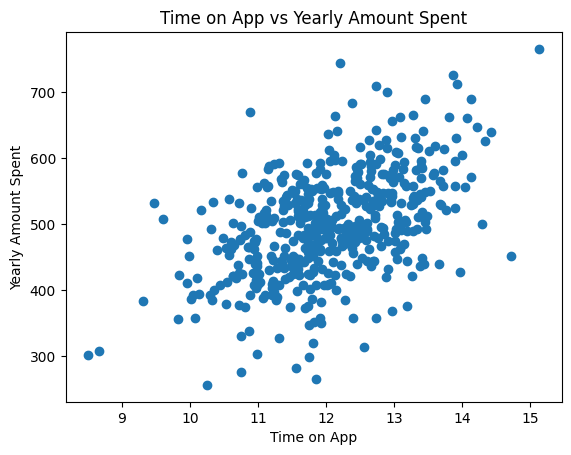

In [40]:
plt.scatter( df['Time_on_App'],df['Yearly_Amount_Spent'])
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Time on App')
plt.title('Time on App vs Yearly Amount Spent')
plt.show()

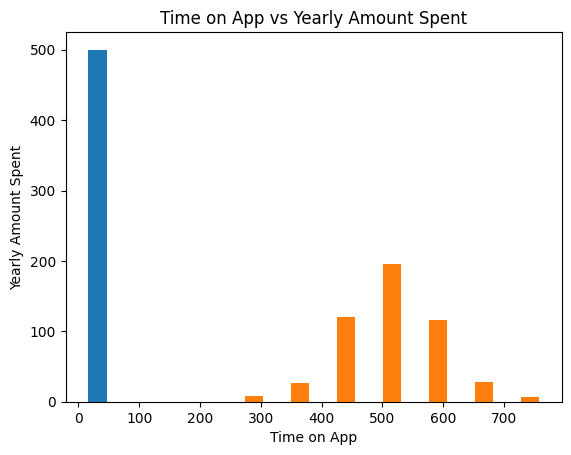

In [19]:
plt.hist(( df['Time_on_App'],df['Yearly_Amount_Spent']))
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Time on App')
plt.title('Time on App vs Yearly Amount Spent')
plt.show()

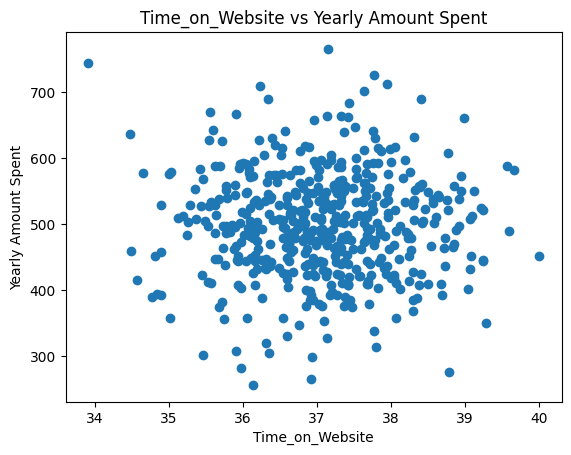

In [21]:
plt.scatter( df['Time_on_Website'],df['Yearly_Amount_Spent'])
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Time_on_Website')
plt.title('Time_on_Website vs Yearly Amount Spent')
plt.show()

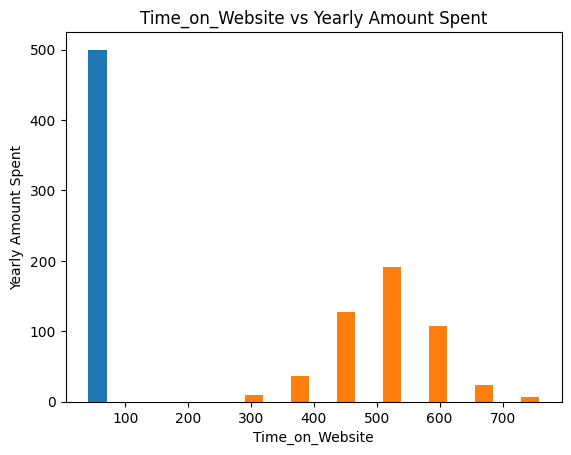

In [23]:
plt.hist( (df['Time_on_Website'],df['Yearly_Amount_Spent']))
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Time_on_Website')
plt.title('Time_on_Website vs Yearly Amount Spent')
plt.show()

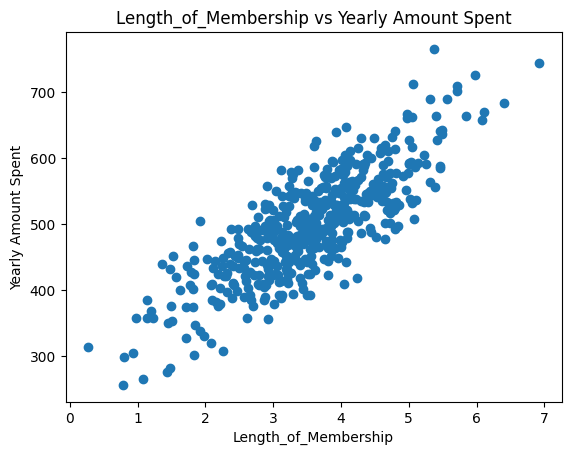

In [24]:
plt.scatter( df['Length_of_Membership'],df['Yearly_Amount_Spent'])
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Length_of_Membership')
plt.title('Length_of_Membership vs Yearly Amount Spent')
plt.show()

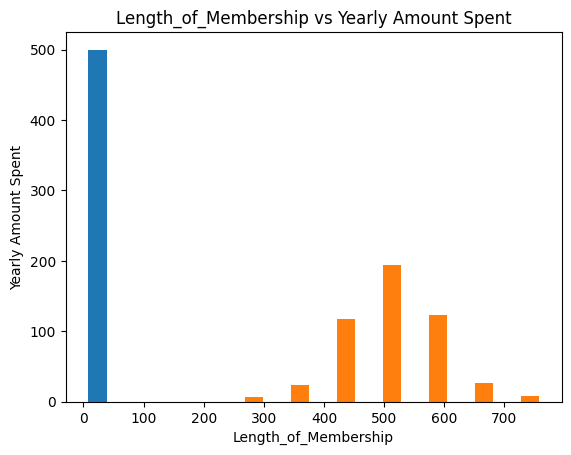

In [26]:
plt.hist(( df['Length_of_Membership'],df['Yearly_Amount_Spent']))
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Length_of_Membership')
plt.title('Length_of_Membership vs Yearly Amount Spent')
plt.show()

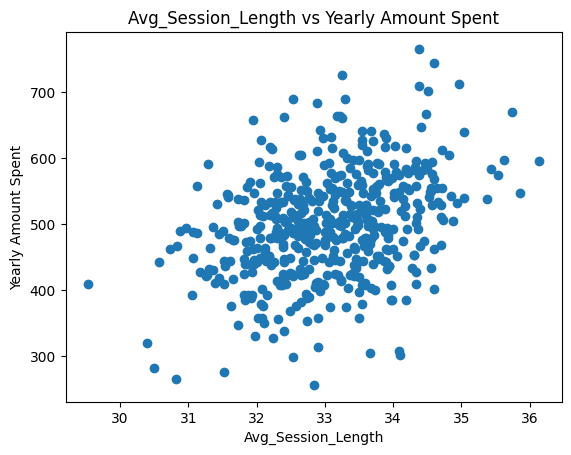

In [29]:
plt.scatter( df['Avg_Session_Length'],df['Yearly_Amount_Spent'])
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Avg_Session_Length')
plt.title('Avg_Session_Length vs Yearly Amount Spent')
plt.show()

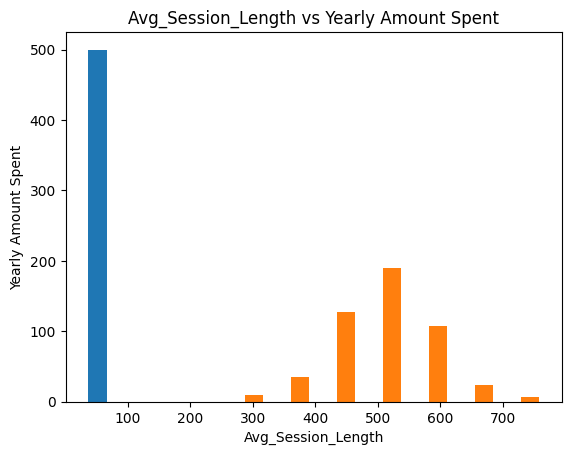

In [32]:
plt.hist(( df['Avg_Session_Length'],df['Yearly_Amount_Spent']))
plt.ylabel('Yearly Amount Spent')
plt.xlabel('Avg_Session_Length')
plt.title('Avg_Session_Length vs Yearly Amount Spent')
plt.show()

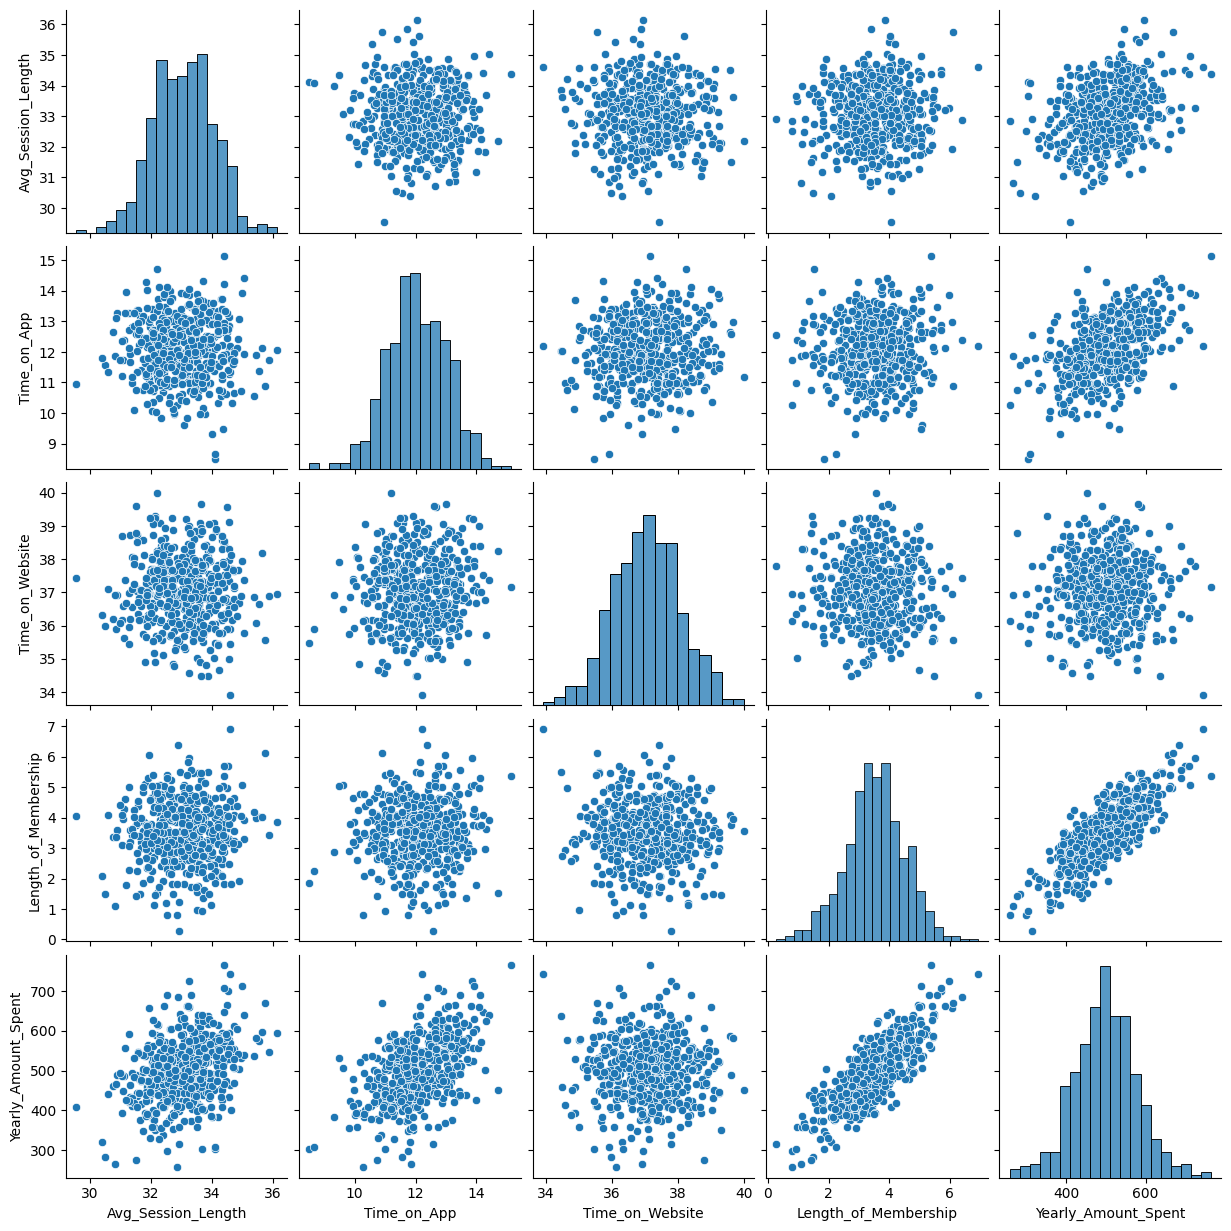

In [34]:
sns.pairplot(df)

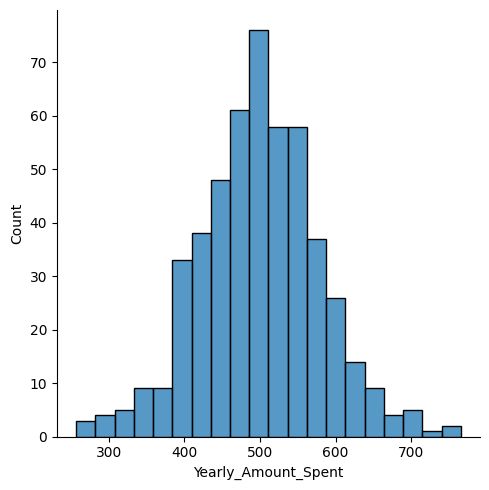

In [44]:
sns.displot(df['Yearly_Amount_Spent'])

In [46]:
temp=df.select_dtypes(include=['float64','int64'])
temp.head()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


<Axes: >

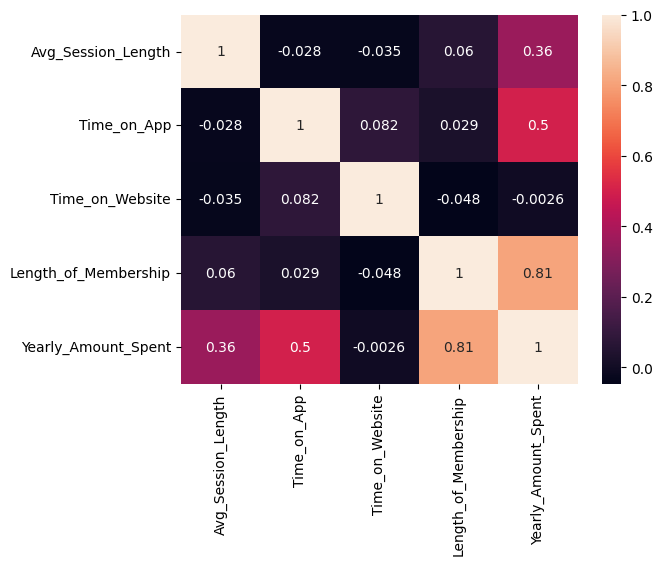

In [47]:
sns.heatmap(temp.corr(),annot=True)

In [49]:
temp.columns


Index(['Avg_Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership', 'Yearly_Amount_Spent'],
      dtype='object')

In [55]:
X=df[['Avg_Session_Length', 'Time_on_App', 'Time_on_Website',
       'Length_of_Membership']]
y=df['Yearly_Amount_Spent']
print(X.head())
print(y.head())

   Avg_Session_Length  Time_on_App  Time_on_Website  Length_of_Membership
0           34.497268    12.655651        39.577668              4.082621
1           31.926272    11.109461        37.268959              2.664034
2           33.000915    11.330278        37.110597              4.104543
3           34.305557    13.717514        36.721283              3.120179
4           33.330673    12.795189        37.536653              4.446308
0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly_Amount_Spent, dtype: float64


In [60]:
model=LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)
print("B : ",model.intercept_)
print("W : ",model.coef_)

B :  -1056.07205930814
W :  [25.70676165 38.57260842  0.62520092 61.71767604]


In [62]:
cdf=pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

In [63]:
cdf

,Coeff
Avg_Session_Length,25.706762
Time_on_App,38.572608
Time_on_Website,0.625201
Length_of_Membership,61.717676


In [66]:
predictions=model.predict(X_test)

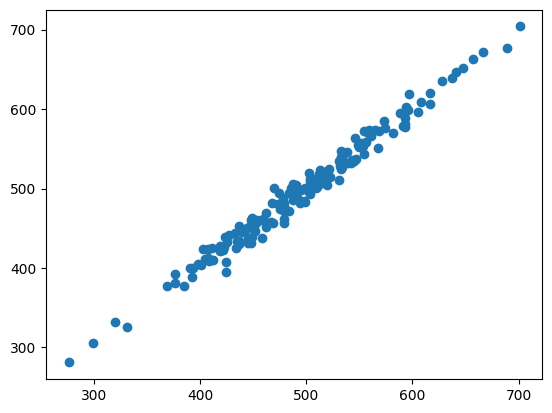

In [67]:
plt.scatter(y_test,predictions)

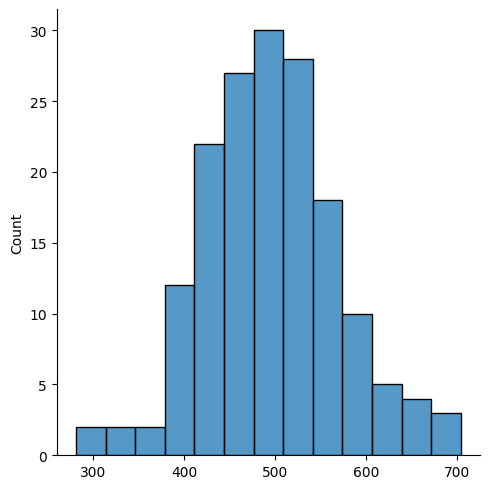

In [69]:
sns.displot(predeictions)

In [72]:
metrics.mean_absolute_error(y_test,predictions)

np.float64(8.353573525017575)

In [74]:
metrics.mean_squared_error(y_test,predictions)

np.float64(102.40428659931906)

In [75]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

np.float64(10.11950031371703)

In [76]:
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

accuracy = 100 - mape
print("accuracy  : ",accuracy)

Mean Absolute Percentage Error (MAPE): 1.74%
accuracy  :  98.26424434248477
